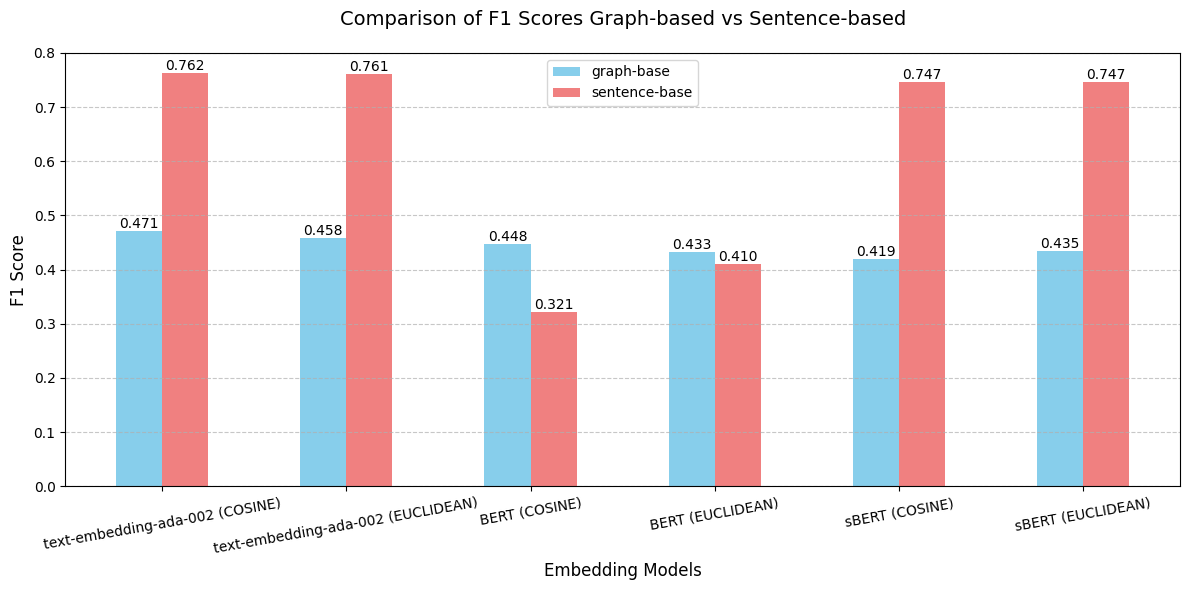

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
data = {
    'Embedding': ['text-embedding-ada-002 (COSINE)', 'text-embedding-ada-002 (EUCLIDEAN)', 'BERT (COSINE)', 'BERT (EUCLIDEAN)',  'sBERT (COSINE)',
                    'sBERT (EUCLIDEAN)','text-embedding-ada-002 (COSINE)', 'text-embedding-ada-002 (EUCLIDEAN)', 'BERT (COSINE)', 'BERT (EUCLIDEAN)',  'sBERT (COSINE)',
                    'sBERT (EUCLIDEAN)'],
    'Method': ['graph-base', 'graph-base', 'graph-base','graph-base', 'graph-base', 'graph-base',
              'sentence-base', 'sentence-base', 'sentence-base','sentence-base', 'sentence-base', 'sentence-base'],
    'F1': [0.471, 0.458, 0.448, 0.433, 0.419, 0.435, 0.762, 0.761, 0.321, 0.410, 0.747, 0.747]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Set width of bars and positions of the bars
bar_width = 0.25
embeddings = ['text-embedding-ada-002 (COSINE)', 'text-embedding-ada-002 (EUCLIDEAN)', 'BERT (COSINE)', 'BERT (EUCLIDEAN)', 'sBERT (COSINE)', 'sBERT (EUCLIDEAN)']
x = np.arange(len(embeddings))

# Create bars for each method
graph_base_mask = df['Method'] == 'graph-base'
sentence_base_mask = df['Method'] == 'sentence-base'

plt.bar(x - bar_width/2, 
        df[graph_base_mask]['F1'], 
        bar_width, 
        label='graph-base',
        color='skyblue')

plt.bar(x + bar_width/2, 
        df[sentence_base_mask]['F1'], 
        bar_width, 
        label='sentence-base',
        color='lightcoral')

# Customize the plot
plt.xlabel('Embedding Models', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title('Comparison of F1 Scores Graph-based vs Sentence-based', 
          fontsize=14, pad=20)
plt.xticks(x, embeddings, rotation=10)  # Changed rotation to 0 for horizontal labels
plt.legend()

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, method in enumerate(['graph-base', 'sentence-base']):
    mask = df['Method'] == method
    for j, value in enumerate(df[mask]['F1']):
        x_pos = j - bar_width/2 if method == 'graph-base' else j + bar_width/2
        plt.text(x_pos, value, f'{value:.3f}', 
                ha='center', va='bottom')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()